In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import *
from matplotlib.colors import LogNorm

In [15]:
video = cv2.VideoCapture('../videos/moire_video.mp4')

In [11]:
frameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

In [12]:
frameCount

2190

In [16]:
for i in range(800):
    ret, frame = video.read()

In [34]:
ret, frame = video.read()

In [167]:
n_frame = np.zeros(frame.shape).astype(np.uint8)

In [168]:
# BGR
# RGB
n_frame[:,:,0] = frame[:,:,2]
n_frame[:,:,1] = frame[:,:,1]
n_frame[:,:,2] = frame[:,:,0]

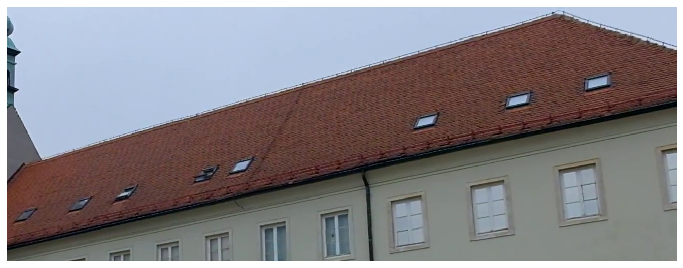

In [176]:
plt.figure(figsize=(12,12))
plt.axis('off')
#plt.imshow(n_frame)
plt.imshow(n_frame[0:500,600:])
#plt.imshow(n_frame[500:700,700:])

In [177]:
n_frame = n_frame[0:500,600:]
#n_frame = n_frame[500:700,700:]

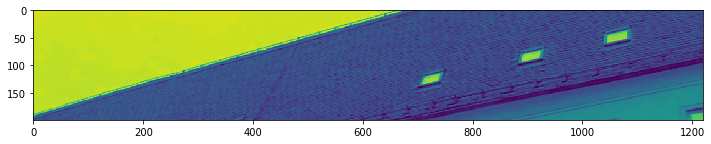

In [92]:
plt.figure(figsize=(12,12))
plt.imshow(n_frame[:,:,2])

In [159]:
r = n_frame[:,:,0]
g = n_frame[:,:,1]
b = n_frame[:,:,2]

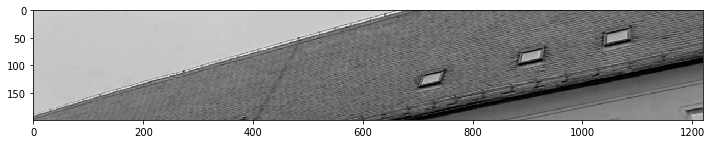

In [152]:
plt.figure(figsize=(12,12))
plt.imshow(r, cmap='gray')

In [178]:
r_fft = fft2(r)

In [179]:
r_fft_shift = fftshift(r_fft)

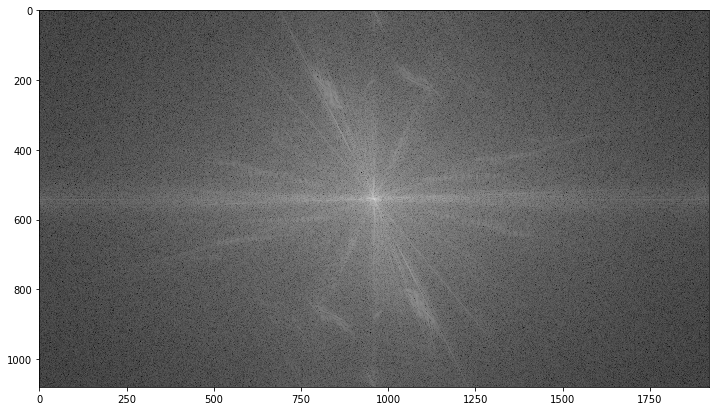

In [180]:
plt.figure(figsize=(12,12))
plt.imshow(np.abs(r_fft_shift), cmap='gray', norm=LogNorm(vmin=5))

In [181]:
r_median = cv2.medianBlur(r,7)
g_median = cv2.medianBlur(g,7)
b_median = cv2.medianBlur(b,7)

In [164]:
r_bil = cv2.bilateralFilter(r,4,100,100)

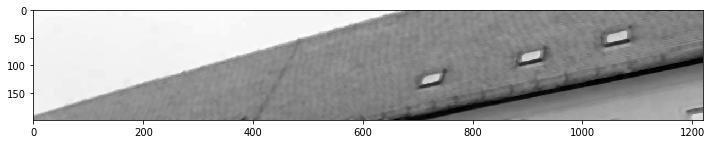

In [99]:
plt.figure(figsize=(12,12))
plt.imshow(r_median, cmap='gray')

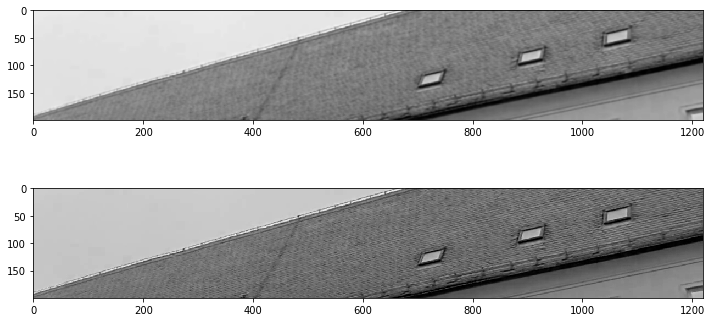

In [112]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.imshow(r_bil, cmap='gray')
plt.subplot(212)
plt.imshow(r, cmap='gray')

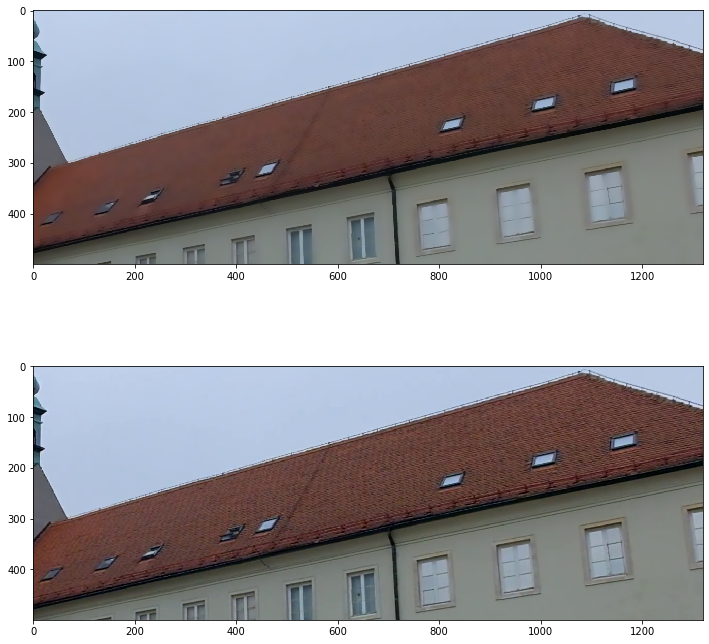

In [182]:
n_frame_bil = cv2.bilateralFilter(n_frame,18,50,50)
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(n_frame_bil, cmap='gray')
plt.subplot(212)
plt.imshow(n_frame, cmap='gray')

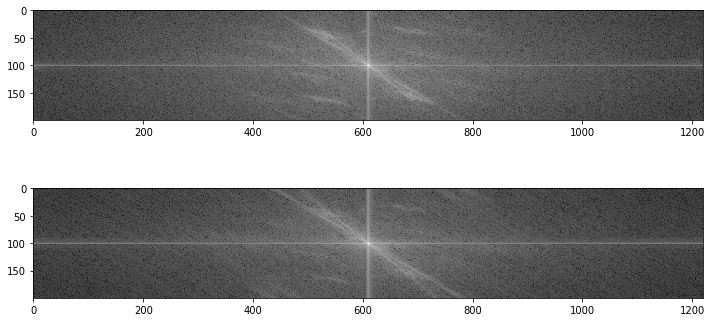

In [124]:
r2 = n_frame_bil[:,:,0]
r2_fft = fft2(r2)
r2_fft_shift = fftshift(r2_fft)
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.imshow(np.abs(r_fft_shift), cmap='gray', norm=LogNorm(vmin=5))
plt.subplot(212)
plt.imshow(np.abs(r2_fft_shift), cmap='gray', norm=LogNorm(vmin=5))

In [100]:
n_frame_median = np.zeros(n_frame.shape).astype(np.uint8)

In [101]:
n_frame_median[:,:,0] = r_median
n_frame_median[:,:,1] = g_median
n_frame_median[:,:,2] = b_median

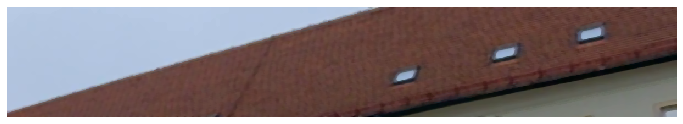

In [102]:
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(n_frame_median)